## For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### 1. Has the network latency gone up since we switched internet service providers?

In [ ]:
# H0 = The time for computer ping is the same or worse.
# Ha = The time for computer ping is better/faster.

True Positive
    small p-value -- < alpha (.001)
    reject H0
    
    The data shows that suvery score did improve
    avg survey score before switching internet service: 65 ms
    avg survey score after switching internet services: 60 ms

False Positive
    
    small p-value
    reject H0
    
    Test was re-taken while internet activity had significantly increased.
    Causing an increase in ping time.
True Negative
    
    highter p-value
    fail to reject H0
    
    we found no difference in survey scores did improve
    avg survey score before switching internet service: 65 ms
    avg survey score after switching internet services: 60 ms


False Negative
    
    higher p-value
    faile to rejct H0
    
    test was originally taken while internet activity had siginificantly increased, causing an increase in ping time
    
    avg survey score before switching internet service: 65 ms
    avg survey score after switching internet services: 60 ms

### 2. Is the website redesign any good?

In [ ]:
# H0 = The avg visits is equal or has decreased.
# Ha = The avg visits has increased.

True Positive
   
    small p-value -- < alpha (.001)
    reject H0
    
    The data shows that suvery score did improve the website
    avg visits before redesign: 1000
    avg visits after redesign: 5000

False Positive
    
    small p-value
    reject H0
    
    The data shows that suvery score did improve the website
    avg visits before redesign: 1000
    avg visits after redesign: 5000
    
    Second test was done on Cyber Monday
True Negative
    
    highter p-value
    fail to reject H0

    The data shows that the website did worse after redesign
    avg visits before redesign: 5000
    avg visits after redesign: 1000


False Negative
    
    higher p-value
    faile to rejct H0
   
    The data shows that the website did worse after redesign, website crashed during re-test
    avg visits before redesign: 5000
    avg visits after redesign: 1000

### 3. Is our television ad driving more sales?

In [ ]:
# H0 = Monthly avg sales stayed the same or decreased after airing ad
# Ha = Monthly avg sales increased after airing ad

True Positive
   
    small p-value -- < alpha (.001)
    reject H0
    
    The data shows that sales increased after airing ad
    avg monthly sales before ad: 10000
    avg monthly sales after ad: 15000

False Positive
    
    small p-value
    reject H0
    
    The data shows that sales increased after airing ad
    avg monthly sales before ad: 10000
    avg monthly sales after ad: 15000
    
    competitor across street closed after test
True Negative
    
    highter p-value
    fail to reject H0

    The data shows that sales decreased after airing ad
    avg monthly sales before ad: 15000
    avg monthly sales after ad: 10000

False Negative
    
    higher p-value
    faile to rejct H0
   
    The data shows that sales decreased after airing ad
    avg monthly sales before ad: 15000
    avg monthly sales after ad: 10000
    
    extreme weather caused lower customer traffic

In [ ]:
stats.ttest_ind_from_stats()

## Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [20]:
mean1 = 90
std1 = 15
size1 = 40
mean2 = 100
std2 = 20
size2 = 50
α=0.05
stats.ttest_ind_from_stats(mean1, std1, size1, mean2, std2, size2)

Ttest_indResult(statistic=-2.6252287036468456, pvalue=0.01020985244923939)

In [16]:
office1 = stats.norm(mean1, std1).rvs(size1)

In [17]:
office2 = stats.norm(mean2, std2).rvs(size2)

In [18]:
t, p = stats.ttest_ind(office1,office2, equal_var=False)

In [21]:
t, p, α

(-2.771133563984825, 0.006826396044346134, 0.05)

In [53]:
if (p < α):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## Load the mpg dataset and use it to answer the following questions:

In [96]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
from pydataset import data
mpg = data('mpg')

### a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [26]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [27]:
# H0: there is no difference in fuel-effifiency in cars from 2008 vs 1999
# Ha: there is a difference in fuel-effifiency in cars from 2008 vs 1999

In [28]:
mpg['avg_fuel'] = (mpg['hwy']+mpg['cty'])/2

In [38]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [31]:
avg2008 = mpg[mpg.year == 2008].avg_fuel
avg1999 = mpg[mpg.year == 1999].avg_fuel

In [32]:
t,p = stats.ttest_ind(avg2008, avg1999, equal_var = False)

In [33]:
t,p

(-0.21960177245940962, 0.8263750772060638)

In [54]:
if (p < α):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### b. Are compact cars more fuel-efficient than the average car?


In [36]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [39]:
avg_com = mpg[mpg['class']=='compact'].avg_fuel
avg_notc = mpg[mpg['class']!= 'compact'].avg_fuel

In [49]:
avg_notc.var()

23.652794548904602

In [40]:
t,p = stats.ttest_ind(avg_com, avg_notc, equal_var = False)

In [50]:
t, p/2

(4.443514012903071, 8.976124499958965e-06)

In [51]:
if ((p/2 < α)):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### c. Do manual cars get better gas mileage than automatic cars?

In [ ]:
# H0: there is no difference in gas mileage in manual and automatic cars
# Ha: manual cars get better gas mileage than automatic cars

In [45]:
m = mpg[mpg['trans'].astype(str).str[0]=='m'].avg_fuel
a = mpg[mpg['trans'].astype(str).str[0]!='m'].avg_fuel

In [46]:
t,p = stats.ttest_ind(m,a,equal_var = False)

In [47]:
t,p

(4.443514012903071, 1.795224899991793e-05)

In [52]:
if ((p/2 < α)):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [88]:
df = pd.read_csv('telco_churn1.csv')

In [89]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Tenure with monthly charges

p= 4.0940449915016345e-99
r= 0.24789985628615002


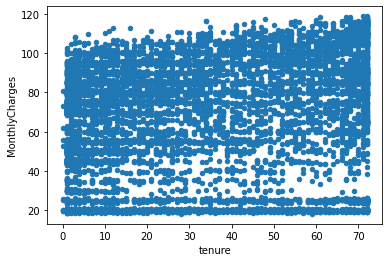

In [90]:
r,p = stats.pearsonr(df.tenure, df.MonthlyCharges)
x = df.tenure
y = df.MonthlyCharges
df.plot.scatter(y='MonthlyCharges', x='tenure')

print('p=', p)
print('r=', r)

In [ ]:
# Tenure with total charges

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [99]:
df.TotalCharges = df.TotalCharges.str.strip().replace('',0).astype(float)

In [100]:
df.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

p= 0.0
r= 0.8261783979502422


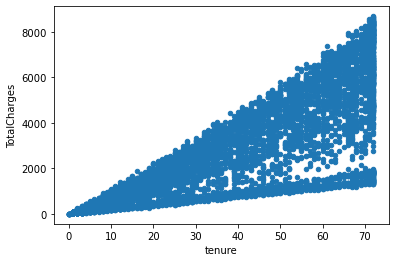

In [101]:
r,p = stats.pearsonr(df.tenure, df.TotalCharges)
x = df.tenure
y = df.TotalCharges
df.plot.scatter(y='TotalCharges', x='tenure')

print('p=', p)
print('r=', r)

In [ ]:
# Control phone

In [102]:
df = df.dropna()

In [ ]:
# People with phone service, total charges and tenure

p= 0.0
r= 0.8301076972900364


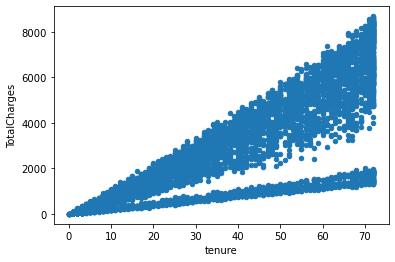

In [122]:
r,p = stats.pearsonr(df[df.PhoneService == 'Yes'].tenure, df[df.PhoneService == 'Yes'].TotalCharges )
x = df[df.PhoneService == 'Yes'].tenure
y =  df[df.PhoneService == 'Yes'].TotalCharges
df[df.PhoneService == 'Yes'].plot.scatter(y='TotalCharges', x='tenure')

print('p=', p)
print('r=', r)

In [ ]:
# People without phone service, total charges and tenure

p= 0.0
r= 0.9535697728407464


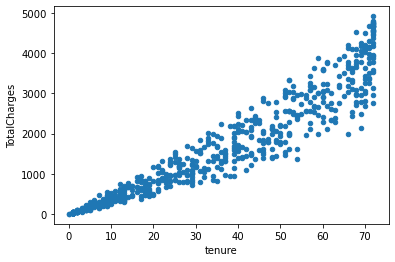

In [121]:
r,p = stats.pearsonr(df[df.PhoneService == 'No'].tenure, df[df.PhoneService == 'No'].TotalCharges )
x = df[df.PhoneService == 'No'].tenure
y =  df[df.PhoneService == 'No'].TotalCharges
df[df.PhoneService == 'No'].plot.scatter(y='TotalCharges', x='tenure')

print('p=', p)
print('r=', r)

In [ ]:
# Control Internet

In [ ]:
# People with DSL internet service, total charges and tenure

p= 0.0
r= 0.9413276892816258


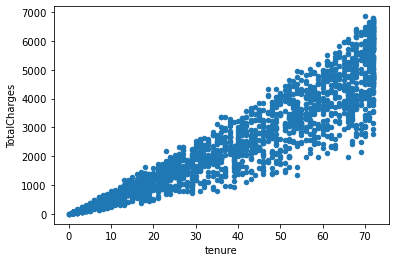

In [120]:
r,p = stats.pearsonr(df[df.InternetService == 'DSL'].tenure, df[df.InternetService == 'DSL'].TotalCharges )
x = df[df.InternetService == 'DSL'].tenure
y =  df[df.InternetService == 'DSL'].TotalCharges
df[df.InternetService == 'DSL'].plot.scatter(y='TotalCharges', x='tenure')

print('p=', p)
print('r=', r)

p= 0.0
r= 0.9853093528070603


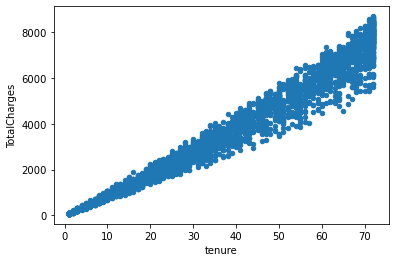

In [123]:
r,p = stats.pearsonr(df[df.InternetService == 'Fiber optic'].tenure, df[df.InternetService == 'Fiber optic'].TotalCharges )
x = df[df.InternetService == 'Fiber optic'].tenure
y =  df[df.InternetService == 'Fiber optic'].TotalCharges
df[df.InternetService == 'Fiber optic'].plot.scatter(y='TotalCharges', x='tenure')

print('p=', p)
print('r=', r)

p= 0.0
r= 0.9853093528070603


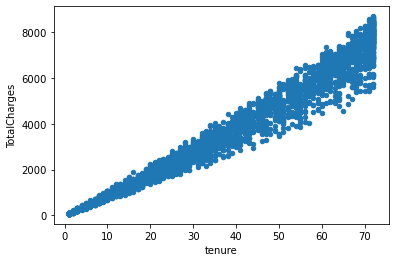

In [125]:
r,p = stats.pearsonr(df[df.InternetService == 'Fiber optic'].tenure, df[df.InternetService == 'Fiber optic'].TotalCharges )
x = df[df.InternetService == 'Fiber optic'].tenure
y =  df[df.InternetService == 'Fiber optic'].TotalCharges
df[df.InternetService == 'Fiber optic'].plot.scatter(y='TotalCharges', x='tenure')

print('p=', p)
print('r=', r)

p= 0.0
r= 0.9815669784401057


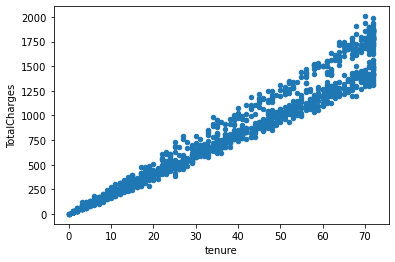

In [126]:
r,p = stats.pearsonr(df[df.InternetService == 'No'].tenure, df[df.InternetService == 'No'].TotalCharges )
x = df[df.InternetService == 'No'].tenure
y =  df[df.InternetService == 'No'].TotalCharges
df[df.InternetService == 'No'].plot.scatter(y='TotalCharges', x='tenure')

print('p=', p)
print('r=', r)

## Use the employees database.

In [127]:
from env import host, user, password

get_db_url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [169]:
query = '''
SELECT *
FROM employees JOIN salaries USING(emp_no)
WHERE to_date>now()
'''
emp_s = pd.read_sql(query, get_db_url)
emp_s

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01
...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01


#### Is there a relationship between how long an employee has been with the company and their salary?

In [170]:
emp_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


In [171]:
emp_s['from_date'] = pd.to_datetime(emp_s['from_date'])

In [172]:
emp_s['hire_date'] = pd.to_datetime(emp_s['hire_date'])

In [173]:
emp_s['tenure'] = (pd.Timestamp.now()- emp_s['hire_date']) / np.timedelta64(1, 'M')

In [174]:
r,p = stats.pearsonr(emp_s.tenure, emp_s.salary )
print('p=', p)
print('r=', r)

p= 0.0
r= 0.3064625613186078


<AxesSubplot:xlabel='tenure', ylabel='salary'>

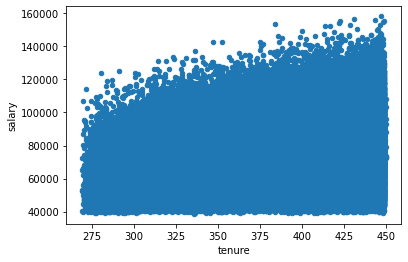

In [175]:
x = emp_s.tenure
y = emp_s.salary
emp_s.plot.scatter(y='salary', x='tenure')

#### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [206]:
query = '''
SELECT emp_no, datediff(now(), hire_date) as tenure, COUNT(*) as n_title
FROM employees JOIN titles USING(emp_no)
GROUP BY emp_no
'''
emp_t = pd.read_sql(query, get_db_url)
emp_t

,emp_no,tenure,n_title
0,10001,13150,1
1,10002,13367,1
2,10003,13087,1
3,10004,12992,2
4,10005,11976,2
...,...,...,...
300019,499995,10758,1
300020,499996,11596,2
300021,499997,13216,2
300022,499998,10484,2


In [208]:
r,p = stats.pearsonr(emp_t.tenure,emp_t.n_title)
print('p=', p)
print('r=', r)

p= 0.0
r= 0.2665989299136619


<AxesSubplot:xlabel='tenure', ylabel='n_title'>

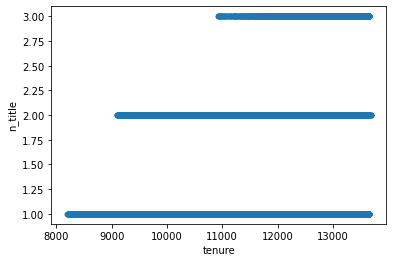

In [211]:
x = emp_t.tenure
y = emp_t.n_title
emp_t.plot.scatter(y='n_title', x='tenure')

## Use the sleepstudy data. Is there a relationship between days and reaction time?

In [213]:
ss = data('sleepstudy')

In [214]:
ss

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [217]:
r,p = stats.pearsonr(ss.Days,ss.Reaction)
print('p=', p)
print('r=', r)

p= 9.894096322214812e-15
r= 0.5352302262650253
